## 데이터 확인
분석에 사용할 데이터 고객 254명의 상품 구매 관련

In [38]:
import pandas as pd

# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('data/sales_data.csv', index_col=['customer_id'])
sales_df

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12433,625,1180950
12471,10,97750
...,...,...
18144,30,90750
18168,243,1533530
18225,1,91430


## 이상치 제거

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

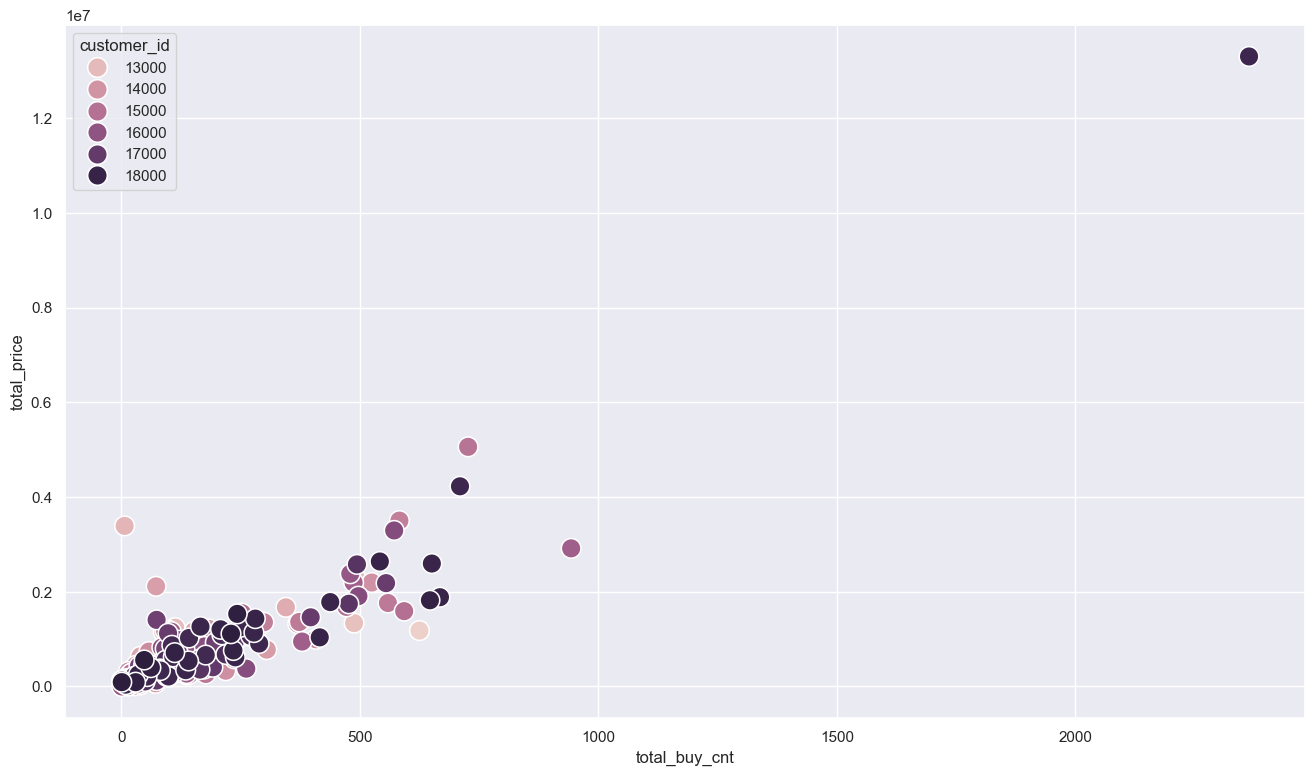

In [39]:
import seaborn as sns

sns.set(style = "darkgrid", rc={"figure.figsize": (16,9)})

sns.scatterplot(x="total_buy_cnt", y="total_price", data=sales_df, hue="customer_id", s=200)

In [40]:
# 함수로 이상치제거
def get_outliers_mask(df):

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    IQR = Q3 - Q1
    
    range_min = Q1 - IQR * 1.5
    range_max = Q3 + IQR * 1.5
    
    
    outlier_per_column =  (df < range_min) | (df > range_max)
    is_outlier = outlier_per_column.any(axis=1)
    
    return is_outlier

any(axis=1): 각 행에 대해 하나라도 True 값이 있으면 True를 반환

axis=1을 사용하는 이유는 데이터프레임의 각 행(row)을 따라 연산을 수행하기 위해서입니다
만약 아무것도 안쓰면 기본값 axis=0 

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

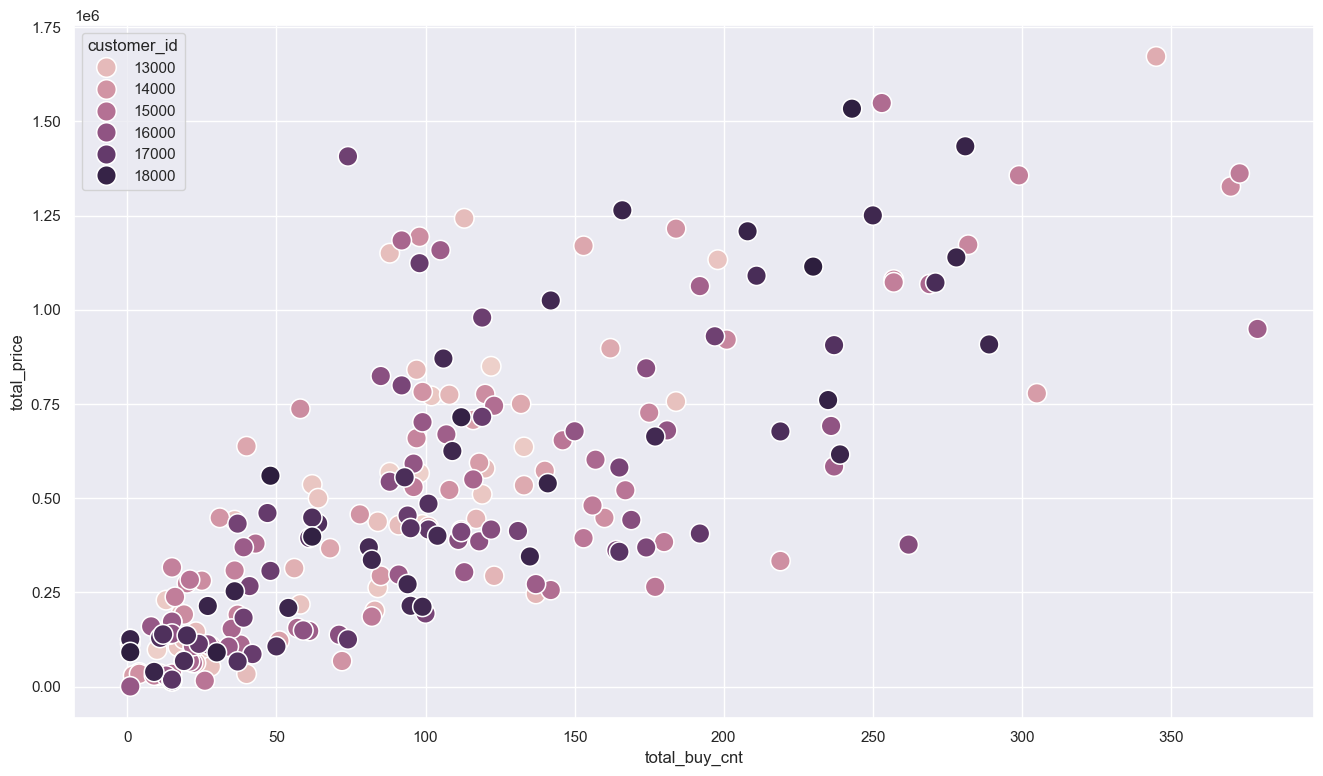

In [41]:
outlier_idx_cust_df = outliers_mask = get_outliers_mask(sales_df)

sales_df = sales_df[~outlier_idx_cust_df]

sns.scatterplot(x="total_buy_cnt", y="total_price", data=sales_df, hue="customer_id", s=200)

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

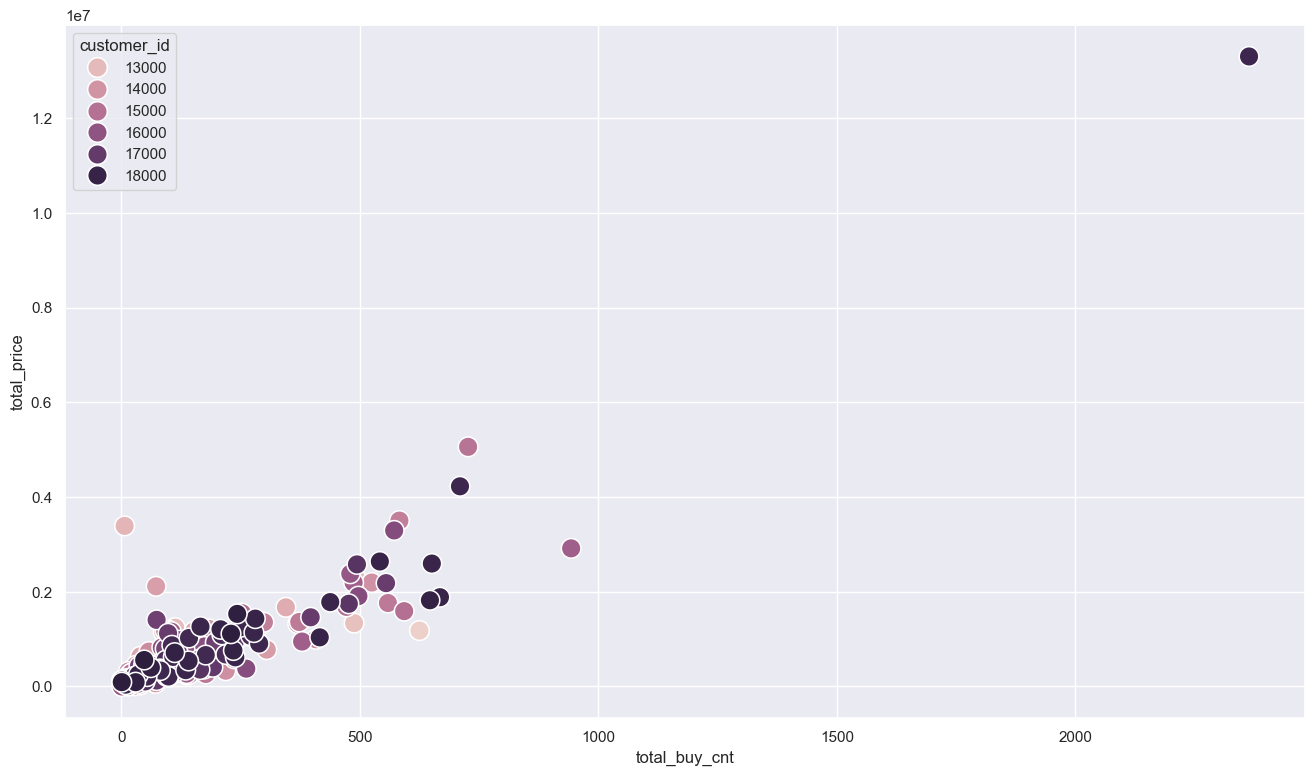

In [119]:
# drop 방법
import pandas as pd

# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('data/sales_data.csv', index_col=['customer_id'])

sns.scatterplot(x="total_buy_cnt", y="total_price", data=sales_df, hue="customer_id", s=200)

In [120]:
Q1 = sales_df.quantile(0.25)
Q3 = sales_df.quantile(0.75)

IQR = Q3 - Q1

outlier = ((sales_df < Q1 - (IQR * 1.5)) | (sales_df > Q3 + (IQR * 1.5))).any(axis=1)

In [121]:
sales_df[outlier]

,total_buy_cnt,total_price
customer_id,,
12433,625,1180950
12838,488,1339170
13013,491,2303640
13145,7,3392500
13705,73,2115930
14083,525,2195970
14449,408,998320
14573,583,3504400
14729,559,1763250


In [122]:
sales_df = sales_df.drop(sales_df[outlier].index)

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

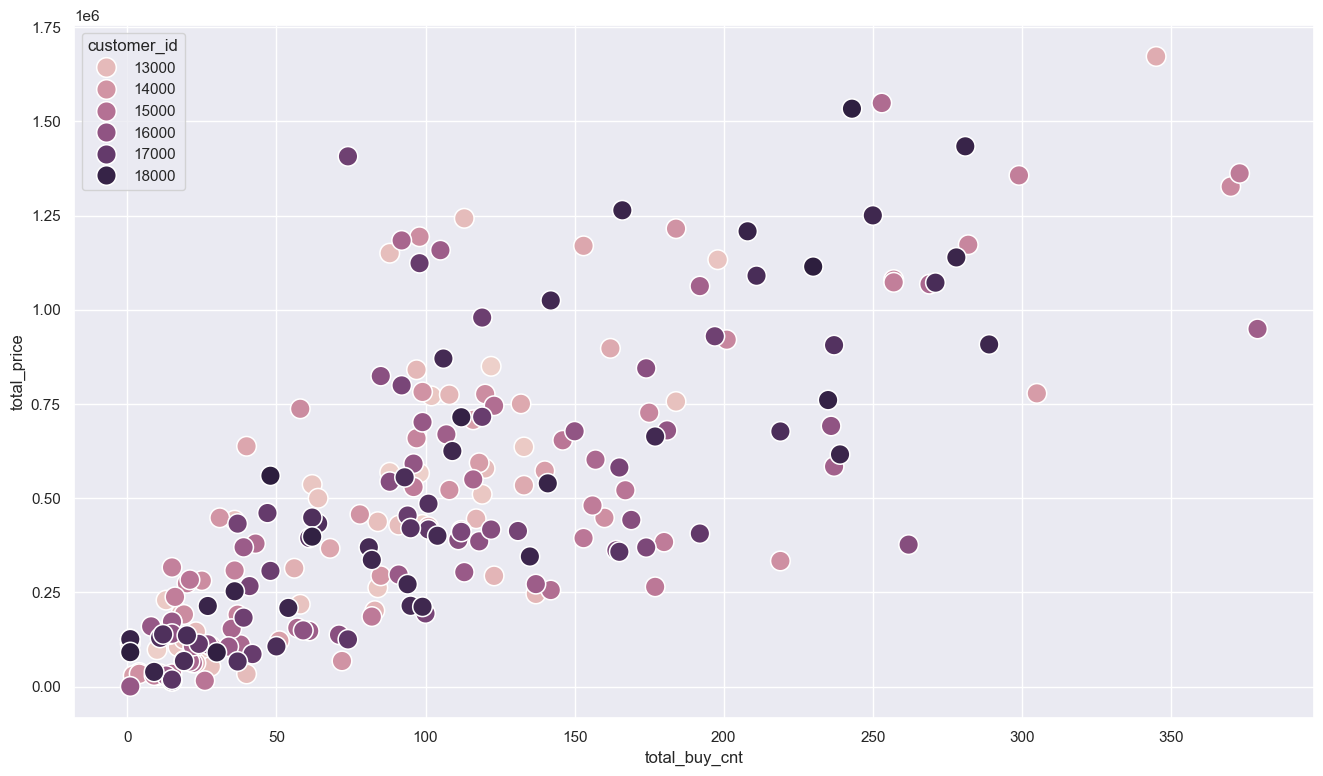

In [123]:
sns.scatterplot(x="total_buy_cnt", y="total_price", data=sales_df, hue="customer_id", s=200)

## 데이터 표준화(Standardization)

Z = X - m / 표준편차

In [124]:
df_mean = sales_df.mean()
df_std = sales_df.std()

Standardization_df = (sales_df - df_mean) / df_std

In [125]:
Standardization_df

,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.02
12472,-0.19,0.21
...,...,...
18144,-0.89,-1.04
18168,1.69,2.74
18225,-1.24,-1.04


In [126]:
Standardization_df.columns = ['total_buy_cnt', 'total_price']

# 인덱스 설정
Standardization_df.index = sales_df.index 

Standardization_df

,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.02
12472,-0.19,0.21
...,...,...
18144,-0.89,-1.04
18168,1.69,2.74
18225,-1.24,-1.04


질문 1
클러스터 분석에 대한 설명 중 옳지 않은 것을 고르세요.

1. 클러스터링은 주어진 데이터들의 특성을 고려해 유사한 데이터끼리 묶어 주는 분석 방법이다.
2. 클러스터링을 통해 고객을 구매 특성에 따라 나눠 볼 수 있다.
3. 클러스터링의 원리 중 하나는 ‘클러스터 내 데이터들 간의 거리 최대화’이다.
4. 클러스터링의 원리 중 하나는 ‘서로 다른 클러스터 사이의 거리 최대화’이다.
5. 클러스터링을 하면 주어진 데이터를 이해하기 쉽게 나눌 수 있다.

퀴즈 해설

정답: 3번

클러스터링의 원리 중 하나는 클러스터 내 데이터들 간의 거리 최대화가 아니라 최소화입니다.

질문 2
클러스터링 전처리에 관한 설명 중 옳지 않은 것을 고르세요.

1. StandardScaler로 스케일링을 진행하면 평균이 0, 분산이 1인 데이터로 변경된다.
2. 이상치는 클러스터링 결과에 영향을 준다.
3. 클러스터링 전에 이상치를 확인해 제거가 필요한지 확인해야 한다.
4. 데이터의 변수들끼리 범위 차이는 크면 클수록 좋다.
5. 클러스터링을 진행했을 때 주어진 데이터를 이해하기 쉽게 나눌 수 있다.

퀴즈 해설

정답: 4번

변수들 사이의 범위 차이가 커지면 분석 결과가 잘못될 가능성이 높아집니다.